In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score
from utils import *

In [2]:
datapath = "./datasets/"
data = pd.read_csv(datapath + "Financial Datasets/Final Transactions.csv")

EDA

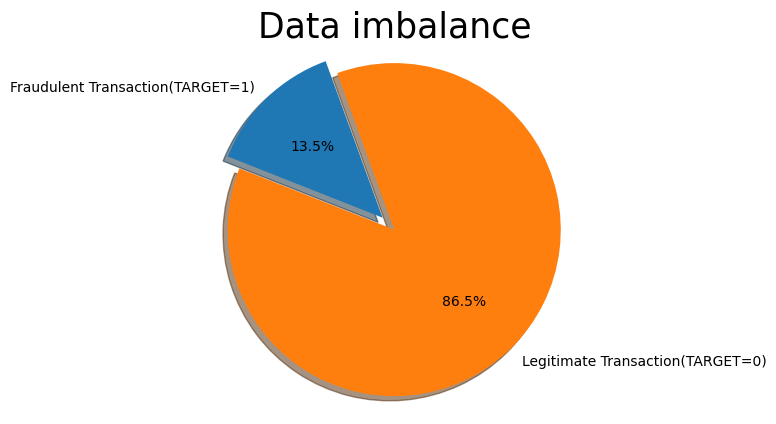

In [3]:
count1 = 0 
count0 = 0
for i in data['TX_FRAUD'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(data['TX_FRAUD']))*100
count0 = (count0/len(data['TX_FRAUD']))*100

x = ['Fraudulent Transaction(TARGET=1)','Legitimate Transaction(TARGET=0)']
y = [count1, count0]


explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

In [7]:
df = data.drop(data.index[0])
fraud = df[df['TX_FRAUD'] == 1]
non_fraud = df[df['TX_FRAUD'] == 0]
n_non_fraud = len(non_fraud)
fraud_upsampled = fraud.sample(n_non_fraud, replace=True)
df_upsampled = pd.concat([fraud_upsampled, non_fraud])

df = df_upsampled.sample(frac=0.003, random_state=42).reset_index(drop=True)

In [8]:
df.to_csv('balanced_transactions.csv', index=False)

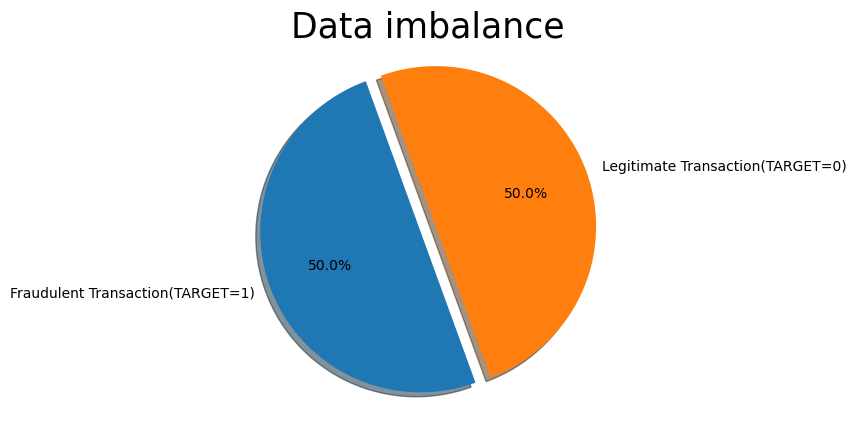

In [70]:
df1 = df_upsampled
count1 = 0 
count0 = 0
for i in df1['TX_FRAUD'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df1['TX_FRAUD']))*100
count0 = (count0/len(df1['TX_FRAUD']))*100

x = ['Fraudulent Transaction(TARGET=1)','Legitimate Transaction(TARGET=0)']
y = [count1, count0]


explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

In [71]:
df_features = df.drop(['TRANSACTION_ID', 'TX_FRAUD','TX_DATETIME','Unnamed: 0','CUSTOMER_ID','TERMINAL_ID','TX_FRAUD_SCENARIO'], axis=1)

print(df_features.head())

   TX_AMOUNT  TX_TIME_SECONDS  TX_TIME_DAYS
0     623.71          9272650           107
1    1049.80          3230469            37
2     510.91         15071963           174
3     426.10          5065768            58
4    1688.45         15417117           178


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_features = scaler.fit_transform(df_features)

In [82]:
X = standardized_features
y = df["TX_FRAUD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [83]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_RFC = model.predict(X_test)

acc = accuracy_score(y_test, y_pred_RFC)
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
print("Random Forest Classifier:")
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm_RFC)

Random Forest Classifier:
Accuracy: 0.9829857299670691
Confusion Matrix:
 [[907   3]
 [ 28 884]]


In [84]:
X_train = pd.DataFrame(X, columns = df_features.columns)
data = pd.concat([X_train,y], axis=1)

In [85]:
data

,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD
0,-0.193368,0.319548,0.322870,0
1,0.091638,-1.003600,-1.001556,1
2,-0.268818,1.589512,1.590535,0
3,-0.325546,-0.601697,-0.604229,0
4,0.518822,1.665096,1.666216,1
...,...,...,...,...
9104,0.218198,0.756477,0.758038,1
9105,0.200827,-1.641194,-1.644849,1
9106,-0.495617,1.288433,1.287809,0
9107,-0.337432,-1.056110,-1.058318,0


In [86]:
9272650/60/60/24

107.32233796296295